In [29]:
#Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [13]:
#Load dataset
data=pd.read_csv('Customer.csv')
data.head()

,CustomerID,Tenure,MonthlyCharge,TotalCharges,Contract,PaymentMethod,PaperlessBilling,AverageUsage,TotalUsage,Churn
0,CUST_1,38,128.570307,4885.671652,Month-to-month,Credit card,0,34.577658,1313.950991,0
1,CUST_2,44,122.904332,5407.790597,One year,Bank transfer,0,43.387375,1909.044500,0
2,CUST_3,13,79.127233,1028.654035,Month-to-month,Credit card,0,14.974818,194.672633,0
3,CUST_4,9,88.537223,796.835005,Month-to-month,Electronic check,0,14.611459,131.503133,1
4,CUST_5,10,148.100000,1481.000003,One year,Electronic check,1,15.346697,153.466972,0


In [12]:
#Data Preprocessing
data.columns

Index(['CustomerID', 'Tenure', 'MonthlyCharge', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'AverageUsage', 'TotalUsage',
       'Churn'],
      dtype='object')

In [14]:
data.shape

(10000, 10)

In [8]:
data.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharge       0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
AverageUsage        0
TotalUsage          0
Churn               0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        10000 non-null  object 
 1   Tenure            10000 non-null  int64  
 2   MonthlyCharge     10000 non-null  float64
 3   TotalCharges      10000 non-null  float64
 4   Contract          10000 non-null  object 
 5   PaymentMethod     10000 non-null  object 
 6   PaperlessBilling  10000 non-null  int64  
 7   AverageUsage      10000 non-null  float64
 8   TotalUsage        10000 non-null  float64
 9   Churn             10000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB


In [17]:
data.describe()

,Tenure,MonthlyCharge,TotalCharges,PaperlessBilling,AverageUsage,TotalUsage,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,30.400400,85.084025,2585.529299,0.490400,23.773643,875.043449,0.244600
std,17.342409,37.513394,1962.580650,0.499933,10.734317,725.468700,0.429871
min,1.000000,20.006127,20.605553,0.000000,-8.216199,-83.609255,0.000000
25%,15.000000,52.482154,993.730563,0.000000,15.684474,232.703263,0.000000
50%,30.000000,85.601102,2091.346192,0.000000,23.778875,696.955976,0.000000
75%,45.000000,117.516909,3830.800072,1.000000,31.823171,1417.015723,0.000000
max,60.000000,149.967994,8953.491483,1.000000,55.743441,3264.052349,1.000000


In [20]:
data.sample(2)

,Tenure,MonthlyCharge,TotalCharges,Contract,PaymentMethod,PaperlessBilling,AverageUsage,TotalUsage,Churn
4674,51,125.585792,6404.875412,Two year,Electronic check,1,35.696153,1820.503783,0
1145,6,131.678211,790.069267,One year,Bank transfer,1,17.244504,103.467026,1


In [19]:
#Drop irrelevant columns
data=data.drop(columns='CustomerID')

In [ ]:
#Encode categorical variables
data['Churn']=data['Churn'].astype(int)

In [22]:
data=pd.get_dummies(data,columns=['Contract','PaymentMethod'],drop_first=True)

In [23]:
data.head(3)

,Tenure,MonthlyCharge,TotalCharges,PaperlessBilling,AverageUsage,TotalUsage,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,38,128.570307,4885.671652,0,34.577658,1313.950991,0,False,False,True,False,False
1,44,122.904332,5407.790597,0,43.387375,1909.044500,0,True,False,False,False,False
2,13,79.127233,1028.654035,0,14.974818,194.672633,0,False,False,True,False,False


In [25]:
#Select Features and Labels

X=data.drop('Churn',axis=1)
y=data['Churn']

In [26]:
#Splitting data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
#prediction
y_pred=model.predict(X_test)

In [31]:
#Evaluation
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
r=recall_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')

print('Confusion Matrix:')
print(cm)
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'Precision:{precision*100:.2f}%')
print(f'Recall:{r*100:.2f}%')
print(f'F1 score:{f1*100:.2f}%')

Confusion Matrix:
[[1498    0]
 [ 502    0]]
Accuracy:74.90%
Precision:37.45%
Recall:50.00%
F1 score:42.82%


c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


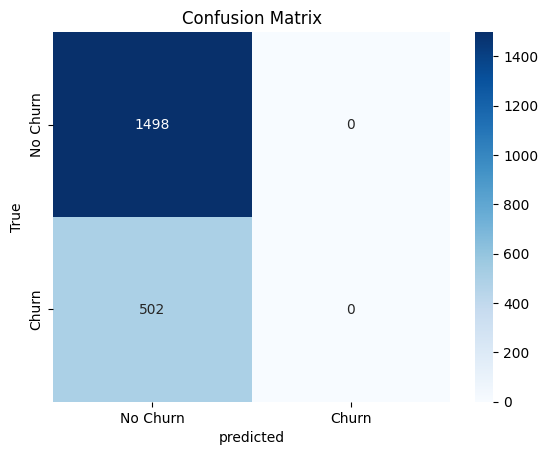

In [39]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=["No Churn",'Churn'],
            yticklabels=['No Churn','Churn'])
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
data=pd.read_csv('spam_detection_dataset.csv')